### YouTube Explore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
comments=pd.read_csv('/content/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

#### Sentiment Analysis of Toutube_comments



In [4]:
#!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity']=polarity

In [12]:
comments.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

#### Lets perform EDA for the Positve sentences

In [13]:
comments_positive=comments[comments['polarity']==1]

In [14]:
comments_positive.shape

(20400, 5)

In [15]:
comments_positive.head()

video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [16]:
#!pip install wordcloud

In [17]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
stopwords=set(STOPWORDS)

In [19]:
total_comments=' '.join(comments_positive['comment_text'])

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

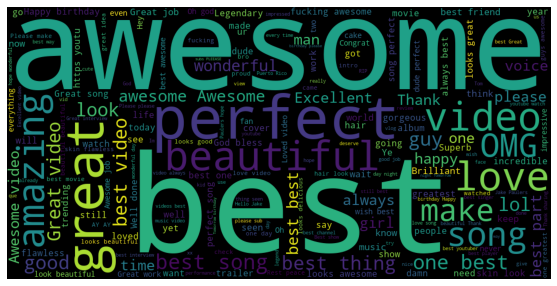

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [22]:
comments_negative=comments[comments['polarity']==-1]

In [23]:
total_comments=' '.join(comments_negative['comment_text'])

In [24]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

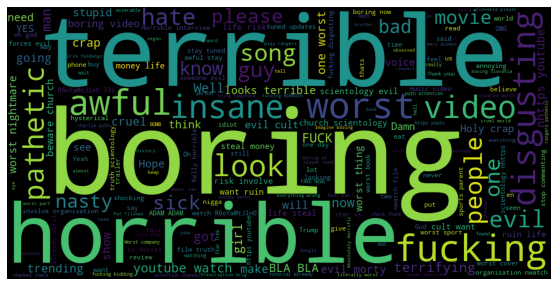

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Analysing Tags column,what are trending tags on youtube

In [26]:
videos=pd.read_csv('/content/GBvideos.csv',error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [27]:
videos.head()

video_id  ...   date
0  jt2OHQh0HoQ  ...  13.09
1  AqokkXoa7uE  ...  13.09
2  YPVcg45W0z4  ...  13.09
3  T_PuZBdT2iM  ...  13.09
4  NsjsmgmbCfc  ...  13.09

[5 rows x 11 columns]

In [28]:
tags_complete=' '.join(videos['tags'])

In [29]:
tags_complete

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [30]:
import re

In [31]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [32]:
tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [33]:
tags=re.sub(' +',' ',tags)

In [34]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

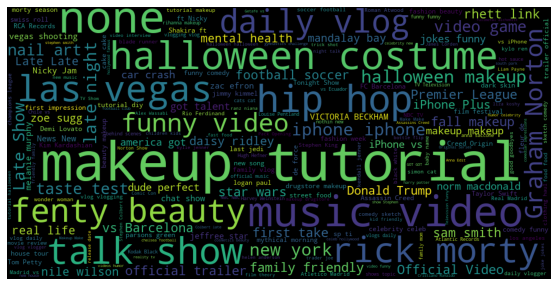

In [35]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Lets find out the relation among continuous variables
#### As quite obvious the number of likes have very strong relation with views

Text(0.5, 1.0, 'Regression plot for views & likes')

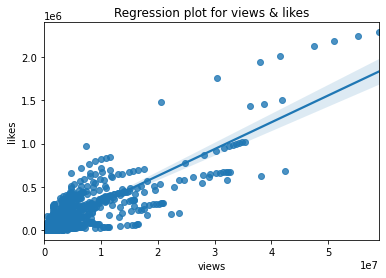

In [36]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

#### dislikes vs views Analysis

Text(0.5, 1.0, 'Regression plot for views & dislikes')

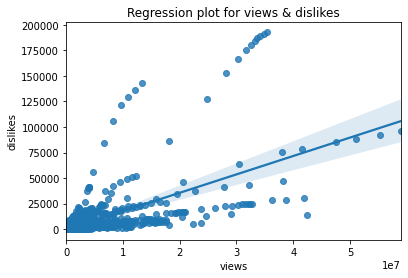

In [37]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

#### Correlation matrix is the evidence of above analysis!

In [38]:
df_corr=videos[['views','likes','dislikes']]

In [39]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.866249  0.671703
likes     0.866249  1.000000  0.623797
dislikes  0.671703  0.623797  1.000000

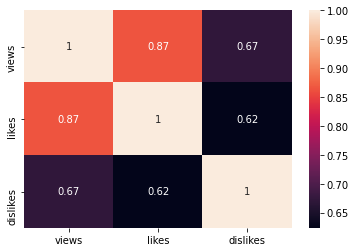

In [40]:
sns.heatmap(df_corr.corr(),annot=True)

### Analyse Emojis in comments

In [41]:
comments.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

In [42]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

    Every emoji has a Unicode associated with it
     '\U0001F600' is a unicode for 😀

In [43]:
print('\U0001F600')

😀


In [44]:
!pip install emoji

     |████████████████████████████████| 133kB 16.5MB/s 


In [45]:
import emoji

In [46]:
len(comments)

718424

In [47]:
comment=comments['comment_text'][1]

In [48]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

[]

In [49]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [50]:
len(str)

0

In [51]:
str

''

    lets create a dictionary of having each emoji with its frequency as well

In [52]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [53]:
result

{}

    sort the emojis according to its count or frequency

In [54]:
result.items()

dict_items([])

In [55]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [56]:
final

{}

In [57]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

In [58]:
keys

[]

In [59]:
values=[*final.values()]

In [60]:
values

[]

In [61]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [62]:
df.head()

Empty DataFrame
Columns: [chars, num]
Index: []

In [63]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [64]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])